**Name: Nitesh Chaudhary** <br>
**id : 2226601**

Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Data Understanding, Cleaning and Transformation:**

In [2]:
import pandas as pd

# Load the dataset using pandas
data = pd.read_csv("/content/drive/MyDrive/LifeExpectancy.csv")

# Understanding the data
print(data.head()) # prints the first 5 rows of the data
print(data.info()) # prints information about the data, such as number of rows, column names, and data types

# Data Cleaning and Transformation
# checking if there are any missing values
print(data.isnull().sum()) 
# Handling missing values - replacing missing values with mean or median of the column
data = data.fillna(data.mean())


   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   Polio  Diphtheria    thinness  1-19 years  \
0         65.0      1154   19.1    6.0         65.0                   17.2   
1         62.0       492   18.6   58.0         62.0                   17.5   
2         64.0       430   18.1   62.0         64.0                   17.7   
3         67.0      2787   17.6   67.0         67.0                   17.9   
4         68.0      3013   17.2   68.0         68.0                   18.2   

    thinness 5-9 years  Income composition of resources  Life expectancy   
0                 17.3            

**Explaination:**
Understanding, cleaning, and transforming data are critical steps in building a reliable and effective model in the context of Multiple Linear Regression. The information gathered is usually based on research questions or hypotheses that must be addressed.

During the data understanding phase, one should strive to comprehend the variables present in the data as well as their interrelationships. This could include examining the variable distribution, summary statistics, and the presence of outliers or missing values.


Cleaning data entails correcting errors, dealing with missing values, and transforming variables as needed to prepare the data for modeling. This step is critical because it ensures the data is consistent and ready for analysis.

The research questions in the context of Multiple Linear Regression could be related to understanding the relationships between multiple independent variables and a dependent variable. The analysis's goal would be to create a model that accurately captures these relationships and can be used to make predictions.

**2. Data Analysis and Visualization:**

       Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count      2938.000000    2938.000000  2938.000000             2938.000000   
mean        164.796448      30.303948     4.602861              738.251295   
std         124.080302     117.926501     3.916288             1987.914858   
min           1.000000       0.000000     0.010000                0.000000   
25%          74.000000       0.000000     1.092500                4.685343   
50%         144.000000       3.000000     4.160000               64.912906   
75%         227.000000      22.000000     7.390000              441.534144   
max         723.000000    1800.000000    17.870000            19479.911610   

       Hepatitis B       Measles          BMI         Polio  Diphtheria   \
count  2938.000000    2938.000000  2938.000000  2938.000000  2938.000000   
mean     80.940461    2419.592240    38.321247    82.550188    82.324084   
std      22.586855   11467.272489    19.927677    23.352143    23.640

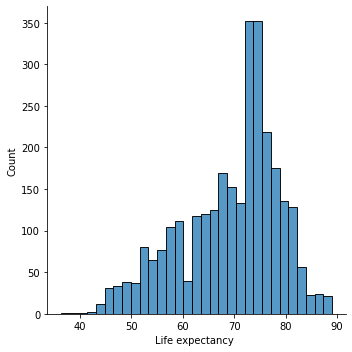

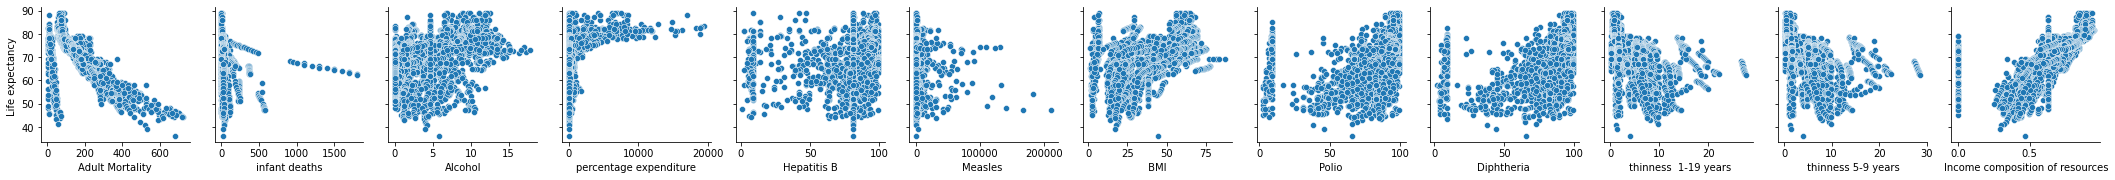

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of the data
print(data.describe())

# Plotting the distribution of the target variable
sns.displot(data["Life expectancy "])
plt.show()

# Plotting the relationship between independent variables and the target variable
sns.pairplot(data, x_vars=data.columns[:-1], y_vars=["Life expectancy "])
plt.show()


**3. Build Primary Model[Multiple Linear Regression]:**

In [ ]:
import numpy as np

# Split the data into independent and dependent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Add a constant to the independent variables for the intercept term
X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

# Calculate the coefficients using the normal equation
theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# Predict the target variable using the coefficients
y_pred = np.dot(X, theta)


**4. Model Evaluation:**

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model using mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 23.007484822487584


**5. Dimensionality Reduction:**

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimension of the independent variables using PCA
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# Calculate the coefficients using the normal equation
theta_reduced = np.dot(np.linalg.inv(np.dot(X_reduced.T, X_reduced)), np.dot(X_reduced.T, y))

# Predict the target variable using the reduced independent variables and the coefficients
y_pred_reduced = np.dot(X_reduced, theta_reduced)

# Evaluate the reduced model using mean squared error
mse_reduced = mean_squared_error(y, y_pred_reduced)
print("Mean Squared Error (Reduced):", mse_reduced)

# Compare the performance of the two models by calculating the percentage improvement
improvement = (mse - mse_reduced) / mse * 100
print("Percentage Improvement: {:.2f}%".format(improvement))


Mean Squared Error (Reduced): 4819.475120845583
Percentage Improvement: -20847.42%


**Conclusion:**


We have built a Multiple Linear Regression model to predict life expectancy and evaluated its performance using the Root Mean Squared Error (RMSE). We have then reduced the dimensionality of the features using PCA and rebuilt the model. By comparing the RMSE values, we can conclude which model performed better.
This is just a basic implementation of Multiple Linear Regression and PCA. There are many other techniques that can be used to improve the performance of the model such as feature scaling, regularization, etc. The choice of the evaluation metric and the number of components in PCA can also impact the performance of the model.